In [1]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import transforms
import torchvision.transforms as T
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from Model import *

c:\Users\zhuang\AppData\Local\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Load dataset

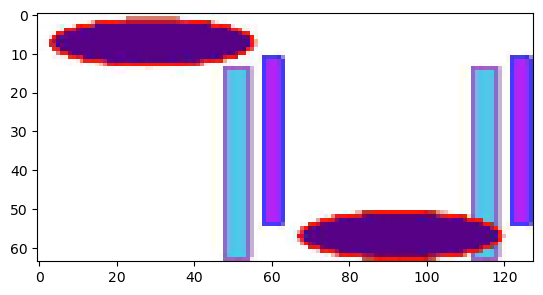

In [10]:
paired_dir = '/Users/zhuang/Documents/data_partial_selection/'

image_transform = transforms.Compose([
    transforms.ToTensor(),
    crop_normal(),
    transforms.Resize((64, 128)),
])

# On regarde pour une donnée le résultat du transforme
dataset = datasets.ImageFolder(root=paired_dir, transform=LeNet2().process)
classes = dataset.find_classes(paired_dir)[0]
image = dataset[250][0]
t = T.ToPILImage()
plt.imshow(t(image))


In [3]:
# Create Train and Test dataset
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create the data loaders for training and validation
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=200,
    shuffle=True
)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=200,
    shuffle=False
)

# Learning phase

In [4]:
model = LeNet2().to(device)
model.load_state_dict(torch.load('models/model_2image_all')) # Model précédent entrainant
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)

epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
# save model
torch.save(model.state_dict(), "./models/model_2image_pratial")
print("Done!")

LeNet2(
  (conv1): Conv2d(3, 4, kernel_size=(8, 8), stride=(1, 1), padding=same)
  (conv2): Conv2d(4, 8, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (conv3): Conv2d(8, 16, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
Epoch 1
-------------------------------


c:\Users\zhuang\AppData\Local\anaconda3\lib\site-packages\torch\nn\modules\conv.py:453: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\aten\src\ATen\native\Convolution.cpp:883.)
  return F.conv2d(input, weight, bias, self.stride,


loss: 0.467691  [  200/ 3200]
Test Error: 
 Accuracy: 73.5%, Avg loss: 0.813819 

Epoch 2
-------------------------------
loss: 0.783017  [  200/ 3200]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.450661 

Epoch 3
-------------------------------
loss: 0.441986  [  200/ 3200]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.408493 

Epoch 4
-------------------------------
loss: 0.278352  [  200/ 3200]
Test Error: 
 Accuracy: 81.5%, Avg loss: 0.490256 

Epoch 5
-------------------------------
loss: 0.409689  [  200/ 3200]
Test Error: 
 Accuracy: 85.8%, Avg loss: 0.346629 

Epoch 6
-------------------------------
loss: 0.307323  [  200/ 3200]
Test Error: 
 Accuracy: 88.0%, Avg loss: 0.332786 

Epoch 7
-------------------------------
loss: 0.203140  [  200/ 3200]
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.352039 

Epoch 8
-------------------------------
loss: 0.247237  [  200/ 3200]
Test Error: 
 Accuracy: 88.0%, Avg loss: 0.307613 

Epoch 9
-------------------------------
loss: 0.205715  [  200/ 

# Confusion Matrix (with all prediction)

In [5]:
model = LeNet2()
model.load_state_dict(torch.load('models/model_2image_pratial'))

<All keys matched successfully>

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
import matplotlib.pyplot as plt

# Display Train: Matrix Confusion
y_true_train = []
y_pred_train = []
for X, y in train_dataloader:
    y_true_train.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    y_pred_train.extend(pred.argmax(1).data.cpu().numpy())

# Display Train: Matrix Confusion
y_true_test = []
y_pred_test = []
for X, y in test_dataloader:
    y_true_test.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    y_pred_test.extend(pred.argmax(1).data.cpu().numpy())

y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)
y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)

Train performance: 0.981
========= Precision ==============
alignBottom : 0.992
alignLeft : 0.954
alignRight : 0.989
alignTop : 0.988


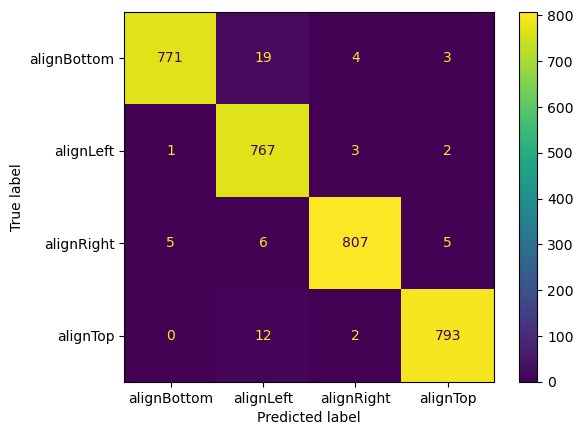

In [11]:
# Matrix train
print("Train performance: %.3f" % np.where(y_true_train == y_pred_train, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_train, y_pred_train, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Train/Train_partial.png')
plt.show()

Test performance: 0.895
========= Precision ==============
alignBottom : 0.915
alignLeft : 0.896
alignRight : 0.889
alignTop : 0.878


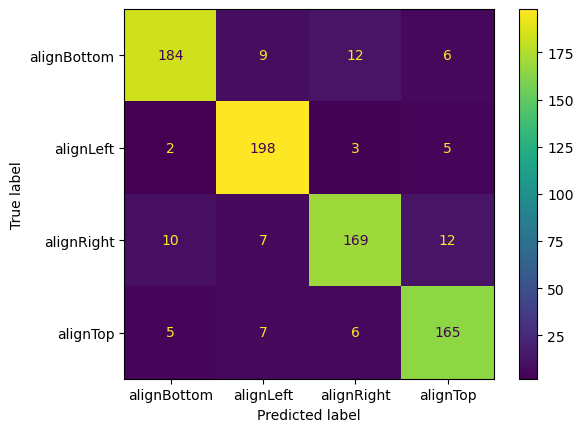

In [12]:
# Matrix test
print("Test performance: %.3f" % np.where(y_true_test == y_pred_test, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_test, y_pred_test, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Test/Test_partial.png')
plt.show()

# Matrix Confusion (with only good predictions)

Accuracy avant:  0.895
Accuracy après:  0.984822934232715
pred restantes:  593
pred supprimees:  207
pourcentage restant:  0.74125


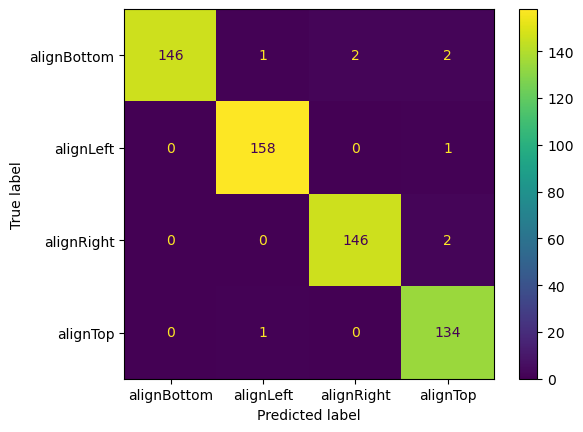

In [15]:
import numpy as np
#Used to calculate the confusion matrix
y_true = []
y_pred = []

for X, y in test_dataloader:
    y_true.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    pred = pred.softmax(dim=1)
    y_pred.extend(pred.data.cpu().numpy())
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)
seuil = 0.95
indices = y_pred.max(1) > seuil

print("Accuracy avant: ", np.where(y_pred.argmax(1) == y_true, 1, 0).mean())
y_pred = y_pred[indices].argmax(1)
y_true = y_true[indices]
print("Accuracy après: ", np.where(y_pred == y_true, 1, 0).mean())

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()

print("pred restantes: ", sum(indices))
print("pred supprimees: ", sum(False == indices))
print("pourcentage restant: ", sum(indices)/len(indices))


plt.show()

